# NLP Challenge: 
### IMDB Dataset of 50K Movie Reviews to perform Sentiment analysis

In [167]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [169]:
df = pd.read_csv("./data/IMDB Dataset.csv")

> ## Quick analysis of the dataset.

In [172]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [174]:
df.shape

(50000, 2)

In [176]:
df['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

In [178]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [180]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


<Axes: xlabel='sentiment', ylabel='count'>

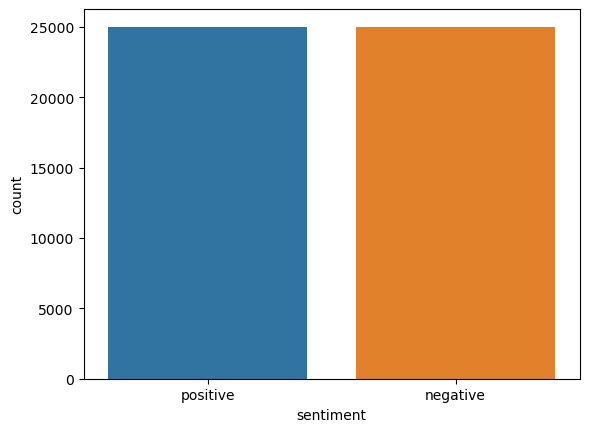

In [182]:
sns.countplot(x="sentiment", data=df)          

> ## Processing the dataset for improved quality

In [185]:
def clean_text_for_symbols(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)  # Remove text within square brackets
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing digits
    return text

# Compile regex pattern for efficiency if used frequently
HTML_TAG_PATTERN = re.compile(r'<.*?>')

def clean_html_tag(text):
    return re.sub(HTML_TAG_PATTERN, '', text)

def clean_text_for_special_char(text):
    # Remove specific characters
    text = re.sub(r'["\',\[\]]', '', text)  
    # Remove newline characters
    text = text.replace('\n', '')  
    return text

# Lambda for applying the clean_text_for_symbols function
cleaned_html_text=lambda x:clean_html_tag(x)
cleaned_for_symbols = lambda x: clean_text_for_symbols(x)
cleaned_for_special_char = lambda x: clean_text_for_special_char(x)

df['review']=pd.DataFrame(df.review.apply(cleaned_html_text))
df['review']=pd.DataFrame(df.review.apply(cleaned_for_symbols))
df['review']=pd.DataFrame(df.review.apply(cleaned_for_special_char))

In [186]:
df.head(10)

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive
5,probably my alltime favorite movie a story of ...,positive
6,i sure would like to see a resurrection of a u...,positive
7,this show was an amazing fresh innovative ide...,negative
8,encouraged by the positive comments about this...,negative
9,if you like original gut wrenching laughter yo...,positive


> ## Using Logistic Regression for classification

In [190]:
# Convert sentiment to binary labels
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [192]:
# Split data
x = df['review']
y = df['sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

#### Convert text to numerical values

In [195]:
# Initialize TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer
tfidf = TfidfVectorizer(max_features=20000, ngram_range=(1, 2))

# Fit and transform text data
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

#### Train the Logistic regression with the model

In [197]:
# Initialize Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
lr_model.fit(x_train_tfidf, y_train)

# Make predictions
y_pred = lr_model.predict(x_test_tfidf)

print(y_pred)

[0 1 0 ... 1 1 1]


#### Evaluate the model performance

In [201]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")



Model Accuracy: 89.79%


In [203]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      9989
           1       0.89      0.91      0.90     10011

    accuracy                           0.90     20000
   macro avg       0.90      0.90      0.90     20000
weighted avg       0.90      0.90      0.90     20000



#### Using the predictions to count the positive and negative reviews

In [206]:
# Count positive and negative reviews
positive_reviews = (y_pred == 1).sum()
negative_reviews = (y_pred == 0).sum()

print(f"Positive Reviews: {positive_reviews}")
print(f"Negative Reviews: {negative_reviews}")


Positive Reviews: 10245
Negative Reviews: 9755
